# Import der Daten

In [3]:
import sqlite3
import time
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io.wavfile
import scipy.signal
import pickle
import math
import os,glob
#%matplotlib widget 

Ordner = 'C:/Users/Macken/Nextcloud/Shared/Python Skripte/Auswertung Blank/TP_02_Messdaten/Trace'
####################################
Datei = 'Beispiel_Trace.csv'
#############################################

Ordner = os.getcwd()
Ordner = Ordner[0:-13] + '/TP_02_Messdaten/Trace/' # Ordnername '/Python' wird in OP Ordner[0:-7] abgezogen

filename = Ordner + Datei
#OP = 'OP-13'

Messdaten = np.loadtxt(filename, delimiter=',', skiprows=20, dtype=float)

#############################################
# Welche Spalten sollen importiert werden?
#############################################
Zeit = Messdaten[:,0]
SP_leist = Messdaten[:,5]
SP_ausl = Messdaten[:,6]
X_soll = Messdaten[:,8]
Y_soll = Messdaten[:,9]
Z_soll = Messdaten[:,10]
#############################################

X_soll = X_soll - X_soll[1] # statischer offset

# Diagramme erstellen
## Allgemeine formatierung

In [4]:
#Für alle möglichen Optionen
#plt.rcParams.keys() 

# Diagrammgröße
plt.rcParams["figure.figsize"] = (10/2.54,6/2.54) # /2.54 inch to cm 

# Linien und Marker
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = .5
plt.rcParams["lines.marker"] = 'o'
plt.rcParams["lines.marker"] = 'o'

# Tics
plt.rcParams["axes.grid"] = True
plt.rc('axes', axisbelow=True)
plt.rcParams["xtick.minor.visible"] = True

# Schriftgröße
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize']  = 6

# Legende
plt.rcParams["legend.loc"] =  'upper right' # lower upper left right center best

# Ausgabeart
#%matplotlib inline  
plt.rcParams['figure.dpi'] = 185 # Regelt auch die Größe des Diagramms in der Notebook Darstellung
plt.rcParams["figure.facecolor"] = "white"

## 2D-Plot über Position

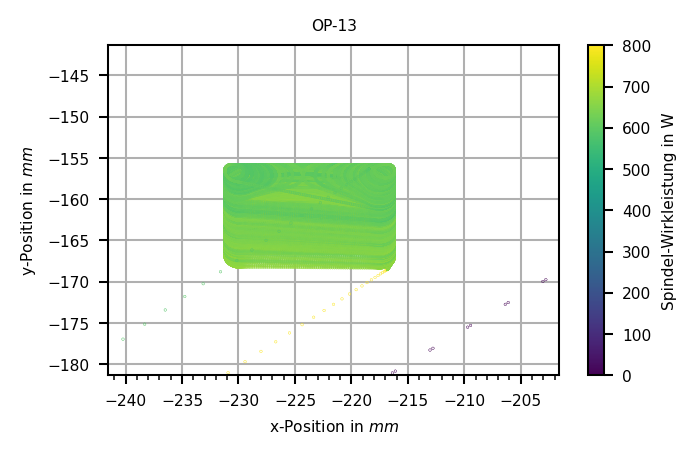

In [5]:
plt.rcParams["lines.markersize"] = .1

fig, ax = plt.subplots() #start des Plots

pos = ax.scatter(X_soll, Y_soll, c=SP_leist, vmin=0, vmax=800, label='Lage')

# Achsenlimits (automatischer zoom an die wichtige stelle)
x_center = np.median(X_soll)
y_center = np.median(Y_soll)
window = 40/2
ax.set_xlim(x_center-window, x_center+window)
ax.set_ylim(y_center-window, y_center+window)

# Beschriftung
ax.set_title("OP-13")
ax.set_xlabel('x-Position in $mm$')
ax.set_ylabel('y-Position in $mm$')

# Legende aufhübschen
#ax.legend(framealpha = 0.5, bbox_to_anchor=(1.33,1.02)) #Framealpha = Liniengrauwert; Position mit bbox_to_anchor in x,y als %-Wert/100
fig.colorbar(pos, label='Spindel-Wirkleistung in W')

plt.show() #ende des Plots

# Diagramm als .png speichern
filename = "Trace_SP_Leist" + "OP-13" + ".png"
fig.savefig(filename, bbox_inches='tight')

## 2D-Plot über Zeit

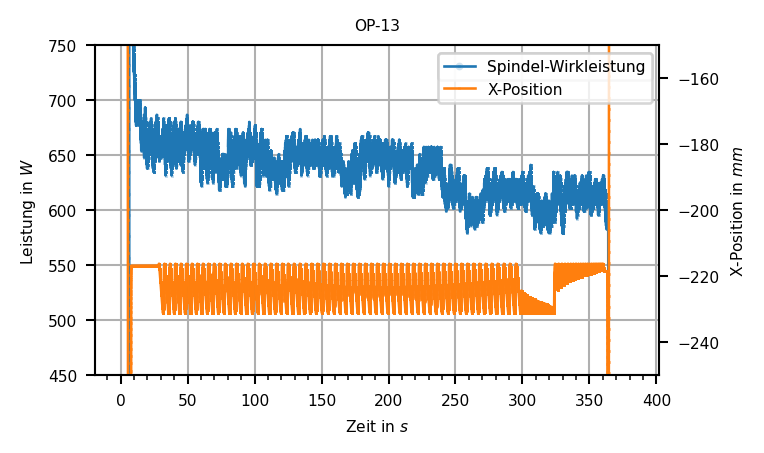

In [6]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

x = Zeit
y = [SP_leist, X_soll]
label = ['Spindel-Wirkleistung', 'X-Position']

pos = ax.plot(x, y[0], label = label[0], color='C0')
ax2.plot(x, y[1], label = label[1], color='C1')

# Achsenlimits
ax.set_ylim(450, 750)
ax2.set_ylim(-250, -150)

# Beschriftung
ax.set_title("OP-13")
ax.set_xlabel('Zeit in $s$')
ax.set_ylabel('Leistung in $W$')
ax2.set_ylabel('X-Position in $mm$')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1)

ax2.grid(False)

# Legende aufhübschen
legend = ax.legend(loc= 'upper right') #(framealpha = 0.5, bbox_to_anchor=(1.33,1.02))
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(2)

plt.show()

# Diagramm als .png speichern
fig.savefig(('Trace_SP_Leist_Zeit'+ "OP-13"), bbox_inches='tight')

## 3D-Plot

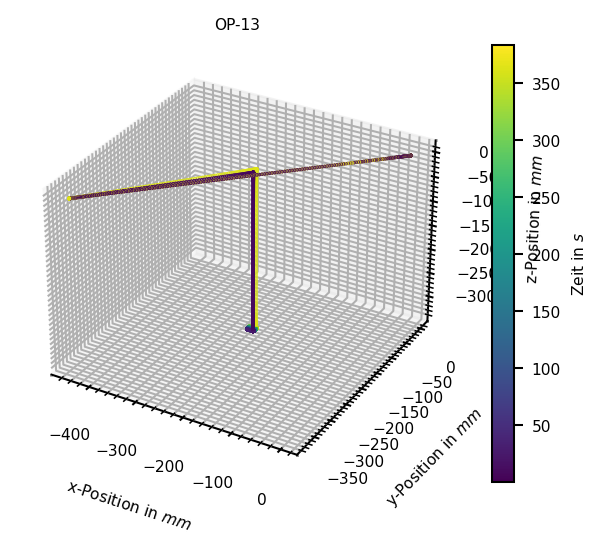

In [7]:
fig = plt.figure()
ax = Axes3D(fig)

#Eigentlicher Plot
#pos = ax.scatter(X_soll, Y_soll, Z_soll) #, c=SP_ausl, label='Lage')
#ax.scatter(Zeit, X_soll)
pos = ax.scatter(X_soll, Y_soll, Z_soll, marker='o', s = 0.1, c = Zeit)

# Achsenlimits
#ax.set_xlim((250-50-70), (250+50-70))
#ax.set_ylim((-120-50+70), (-120+50+70))
#ax.set_zlim(-360-20, -330-20)

ax.set_title("OP-13")
ax.set_xlabel('x-Position in $mm$')
ax.set_ylabel('y-Position in $mm$')
ax.set_zlabel('z-Position in $mm$')

# Legende aufhübschen
#ax.legend(framealpha = 0.5, bbox_to_anchor=(1.33,1.02)) #Framealpha = Liniengrauwert; Position mit bbox_to_anchor in x,y als %-Wert/100
fig.colorbar(pos, label='Zeit in $s$')

plt.show() #ende des Plots

# Diagramm als .png speichern
#filename = Title + ".png"
#fig.savefig(filename, bbox_inches='tight')